<a href="https://colab.research.google.com/github/benniella/Ml-learning/blob/main/my_second_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

# New Section

In [ ]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

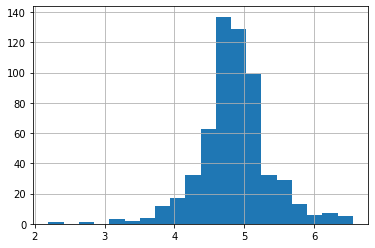

In [ ]:
df['loanAmount_log']= np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins=20)

In [ ]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

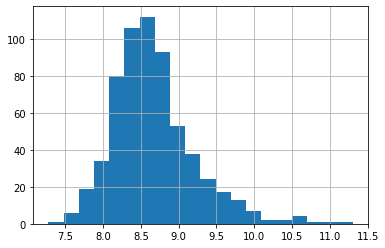

In [ ]:
df['TotalIncome'] = df['ApplicantIncome']+ df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount = df.loanAmount_log.fillna(df.LoanAmount.mean())
-
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

df.isnull().sum()

<ipython-input-8-979918ba746e>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.loanAmount = df.loanAmount_log.fillna(df.LoanAmount.mean())


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
loanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [ ]:
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

x

array([['Male', 'No', '0', ..., 1.0, nan, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [ ]:
print('per of missing gender is %2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

per of missing gender is 0.000000%


number of people who take loan as group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

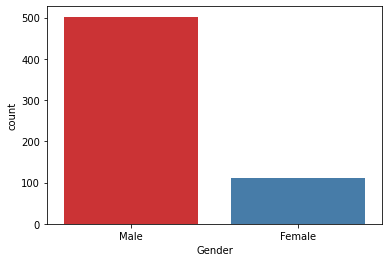

In [ ]:
print('number of people who take loan as group by gender:')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette = 'Set1' )

number of people who take loan as group by marital status:
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

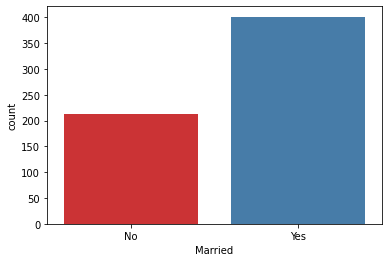

In [ ]:
print('number of people who take loan as group by marital status:')
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette = 'Set1' )

number of people who take loan as group by dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

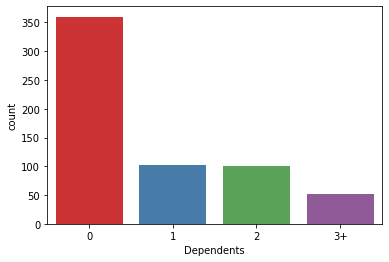

In [ ]:
print('number of people who take loan as group by dependents:')
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette = 'Set1' )

number of people who take loan as group by self employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

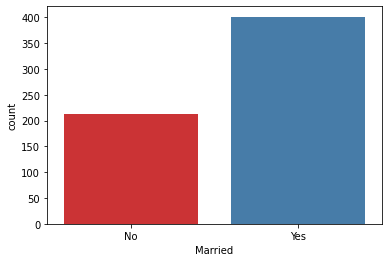

In [ ]:
print('number of people who take loan as group by self employed:')
print(df['Self_Employed'].value_counts())
sns.countplot(x='Married', data=df, palette = 'Set1' )

number of people who take loan as group by loan amount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

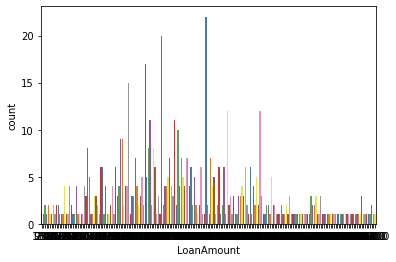

In [ ]:
print('number of people who take loan as group by loan amount:')
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df, palette = 'Set1' )

number of people who take loan as group by Credit history:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

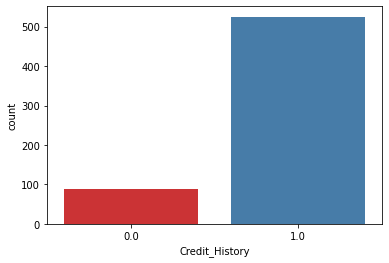

In [ ]:
print('number of people who take loan as group by Credit history:')
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette = 'Set1' )

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [ ]:
for i in range(0, 5):
   x_train[:, i]= Labelencoder_x.fit_transform(x_train[:,i])
   x_train[:,7]*Labelencoder_x.fit_transform(x_train[:,7])

In [ ]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 5858.0],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 11250.0],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 8334.0],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 6033.0],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 6486.0]], dtype=object)

In [ ]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

In [ ]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
for i in range(0, 5):
   x_test[:, i]= Labelencoder_x.fit_transform(x_test[:,i])
   x_test[:,7]*Labelencoder_x.fit_transform(x_test[:,7])

In [ ]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 7085.0],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 4230.0],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 10039.0],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 6784.0],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 3875.0],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 6058.0],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 6417.0],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 12876.0],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 5124.0],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 5233.0],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 2917.0],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2895.0],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 8333.0],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 8667.0],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 14880.0],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 3875.0],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 4311.0],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371

In [ ]:
Labelencoder_y = LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)

In [ ]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train =ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)


rf_clf =RandomForestClassifier()
rf_clf.fit(x_train, y_train)



RandomForestClassifier()

In [ ]:
from sklearn import metrics
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_test = imputer.fit_transform(x_test)

y_pred = rf_clf.predict(x_test)

#print('acc of random forest clf is', metrics.accurarcy_score(y_pred, y_test))
print('acc of random forest clf is', metrics.accuracy_score(y_pred, y_test))

y_pred


acc of random forest clf is 0.7560975609756098


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
#nb_clf.fit(x_train, y_train)
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_classifier.predict(x_test)
print('acc of gaussiaNB is %.', metrics.accuracy_score(y_pred, y_test))

acc of gaussiaNB is %. 0.8373983739837398


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred =dt_clf.predict(x_test)
print("acc of DT is", metrics.accuracy_score(y_pred, y_test))


acc of DT is 0.6991869918699187


In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = kn_clf.predict(x_test)
print('acc of KN is', metrics.accuracy_score(y_pred, y_test))

acc of KN is 0.7886178861788617
